In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ds = xr.open_dataset('DS96_solution_v1.nc')
ds = xr.open_dataset('DS96_solution_v0-Copy1.nc')
# ds['time'] = ds.time/(60*60*24)
ds.close()

In [3]:
ds

<xarray.Dataset>
Dimensions:  (zC: 34, zF: 35, xC: 128, yF: 128, xF: 128, yC: 128, time: 21)
Coordinates:
  * zC       (zC) float64 -1.005e+03 -975.0 -945.0 -915.0 ... -75.0 -45.0 -15.0
  * zF       (zF) float64 -1.02e+03 -990.0 -960.0 -930.0 ... -60.0 -30.0 0.0
  * xC       (xC) float64 15.0 45.0 75.0 105.0 ... 3.765e+03 3.795e+03 3.825e+03
  * yF       (yF) float64 0.0 30.0 60.0 90.0 ... 3.75e+03 3.78e+03 3.81e+03
  * xF       (xF) float64 0.0 30.0 60.0 90.0 ... 3.75e+03 3.78e+03 3.81e+03
  * yC       (yC) float64 15.0 45.0 75.0 105.0 ... 3.765e+03 3.795e+03 3.825e+03
  * time     (time) timedelta64[ns] 0 days 00:00:00 ... 5 days 00:00:00
Data variables:
    v        (time, zC, yF, xC) float64 ...
    w        (time, zF, yC, xC) float64 ...
    T        (time, zC, yC, xC) float64 ...
    u        (time, zC, yC, xF) float64 ...
Attributes:
    interval:              21600.0
    Oceananigans:          This file was generated using Oceananigans v0.90.0...
    Julia:                 This file was generated using Julia Version 1.9.3\...
    output time interval:  Output was saved every 6 hours.
    date:                  This file was generated on 2025-04-29T16:27:16.841.
    schedule:              TimeInterval

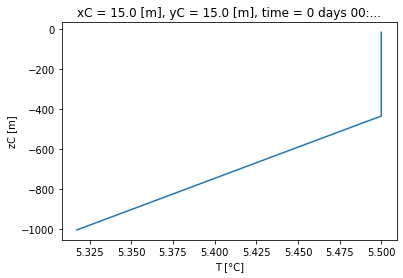

In [5]:
ds.T.isel(time=0, xC=0, yC=0).plot(y='zC')

In [6]:
ds_mean = ds.mean(['time', 'xC', 'yC', 'xF', 'yF'])

In [7]:
ds_mean

<xarray.Dataset>
Dimensions:  (zC: 34, zF: 35)
Coordinates:
  * zC       (zC) float64 -1.005e+03 -975.0 -945.0 -915.0 ... -75.0 -45.0 -15.0
  * zF       (zF) float64 -1.02e+03 -990.0 -960.0 -930.0 ... -60.0 -30.0 0.0
Data variables:
    v        (zC) float64 1.402e-05 3.016e-05 4.076e-05 ... -0.0003177 -0.000236
    w        (zF) float64 0.0 -2.537e-20 2.009e-20 ... 7.744e-21 -1.2e-19 0.0
    T        (zC) float64 5.32 5.326 5.335 5.346 ... 5.466 5.465 5.465 5.459
    u        (zC) float64 3.494e-05 3.691e-05 3.044e-05 ... 0.0002163 0.0003193

In [8]:
prime = (ds - ds_mean).sel(time=slice('2.5 day','3.5 day'))
prime

<xarray.Dataset>
Dimensions:  (zC: 34, zF: 35, xC: 128, yF: 128, xF: 128, yC: 128, time: 5)
Coordinates:
  * zC       (zC) float64 -1.005e+03 -975.0 -945.0 -915.0 ... -75.0 -45.0 -15.0
  * zF       (zF) float64 -1.02e+03 -990.0 -960.0 -930.0 ... -60.0 -30.0 0.0
  * xC       (xC) float64 15.0 45.0 75.0 105.0 ... 3.765e+03 3.795e+03 3.825e+03
  * yF       (yF) float64 0.0 30.0 60.0 90.0 ... 3.75e+03 3.78e+03 3.81e+03
  * xF       (xF) float64 0.0 30.0 60.0 90.0 ... 3.75e+03 3.78e+03 3.81e+03
  * yC       (yC) float64 15.0 45.0 75.0 105.0 ... 3.765e+03 3.795e+03 3.825e+03
  * time     (time) timedelta64[ns] 2 days 12:00:00 ... 3 days 12:00:00
Data variables:
    v        (time, zC, yF, xC) float64 -0.004427 -0.00457 ... 0.01621 -0.003855
    w        (time, zF, yC, xC) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    T        (time, zC, yC, xC) float64 0.000109 0.0001877 ... -0.01878 -0.02075
    u        (time, zC, yC, xF) float64 -0.004982 -0.004262 ... -0.009482

In [9]:
rms_sq = (prime**2).mean(['time', 'xC', 'yC', 'xF', 'yF'])
rms_sq['zC'] = -rms_sq.zC/615
rms_sq['zF'] = -rms_sq.zF/615
rms_sq = rms_sq.rename({'zC':r'$z/z_i$'})

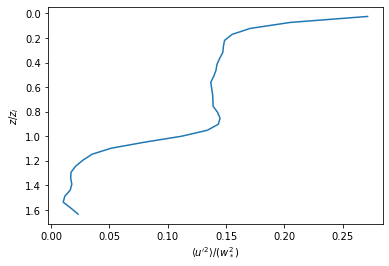

In [10]:
up = (rms_sq.u/0.037**2).rename(r'$\langle u^{\prime 2} \rangle / (w_*^2)$')
up.plot(y=r'$z/z_i$', yincrease=False)

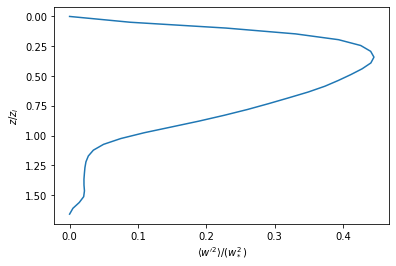

In [11]:
wp = (rms_sq.w/0.037**2).rename({'zF':r'$z/z_i$'}).rename(r'$\langle w^{\prime 2} \rangle / (w_*^2)$')
wp.plot(y=r'$z/z_i$', yincrease=False)

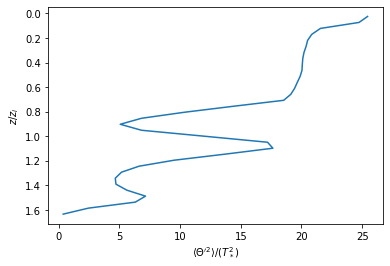

In [12]:
tp = (rms_sq.T/0.002**2).rename(r'$\langle \Theta^{\prime 2} \rangle / (T_*^2)$')
tp.plot(y=r'$z/z_i$', yincrease=False)

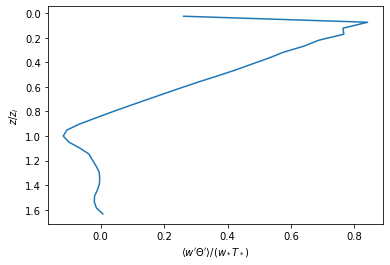

In [13]:
wt_p = (prime.w.interp(zF=prime.zC) * prime.T).mean(['time', 'xC', 'yC']).rename(r'$\langle w^{\prime} \Theta^{\prime} \rangle / (w_* T_*)$')
wt_p['zC'] = -wt_p.zC/615
wt_p = wt_p.rename({'zC':r'$z/z_i$'}) / (0.037 * 0.002)
wt_p.plot(y=r'$z/z_i$', yincrease=False)

In [132]:
# ds_avg = xr.open_dataset('DS96_solution_v0_averaged.nc')
ds_avg = xr.open_dataset('DS96_solution_v1_averaged.nc')
ds_avg.close()
ds_avg

<xarray.Dataset>
Dimensions:  (zC: 34, zF: 35, xC: 128, yF: 128, xF: 128, yC: 128, time: 481)
Coordinates:
  * zC       (zC) float64 -1.005e+03 -975.0 -945.0 -915.0 ... -75.0 -45.0 -15.0
  * zF       (zF) float64 -1.02e+03 -990.0 -960.0 -930.0 ... -60.0 -30.0 0.0
  * xC       (xC) float64 15.0 45.0 75.0 105.0 ... 3.765e+03 3.795e+03 3.825e+03
  * yF       (yF) float64 0.0 30.0 60.0 90.0 ... 3.75e+03 3.78e+03 3.81e+03
  * xF       (xF) float64 0.0 30.0 60.0 90.0 ... 3.75e+03 3.78e+03 3.81e+03
  * yC       (yC) float64 15.0 45.0 75.0 105.0 ... 3.765e+03 3.795e+03 3.825e+03
  * time     (time) timedelta64[ns] 00:00:00 00:15:00 ... 5 days 00:00:00
Data variables:
    u_p2     (time, zC) float64 ...
    T_p2     (time, zC) float64 ...
    w_p2     (time, zF) float64 ...
    wT_p     (time, zF) float64 ...
Attributes:
    interval:              900.0
    Oceananigans:          This file was generated using Oceananigans v0.90.0...
    Julia:                 This file was generated using Julia Version 1.9.3\...
    output time interval:  Output was saved every 15 minutes.
    date:                  This file was generated on 2025-04-29T19:45:52.285.
    schedule:              TimeInterval

In [133]:
ds_avg.isel(time=slice(-98,None)).time
ds_avg.sel(time=slice('2.5 day','3.5 day')).time

<xarray.DataArray 'time' (time: 100)>
array([216000000000000, 216900000000000, 217800000000000, 218700000000000,
       219600000000000, 220500000000000, 221400000000000, 222300000000000,
       223200000000000, 224100000000000, 225000000000000, 225900000000000,
       226800000000000, 227700000000000, 228600000000000, 229500000000000,
       230400000000000, 231300000000000, 232200000000000, 233100000000000,
       234000000000000, 234900000000000, 235800000000000, 236700000000000,
       237600000000000, 238500000000000, 239400000000000, 240300000000000,
       241200000000000, 242100000000000, 243000000000000, 243900000000000,
       244800000000000, 245700000000000, 246600000000000, 247500000000000,
       248400000000000, 249300000000000, 250200000000000, 251100000000000,
       252000000000000, 252900000000000, 253800000000000, 254700000000000,
       255600000000000, 256500000000000, 257400000000000, 258300000000000,
       259200000000000, 260100000000000, 261000000000000, 261900000000000,
       262800000000000, 263700000000000, 264600000000000, 265500000000000,
       266400000000000, 267300000000000, 268200000000000, 269100000000000,
       270000000000000, 270900000000000, 271800000000000, 272700000000000,
       273600000000000, 274500000000000, 275400000000000, 276300000000000,
       277200000000000, 278100000000000, 279000000000000, 279900000000000,
       280800000000000, 281700000000000, 282600000000000, 283500000000000,
       284400000000000, 285300000000000, 286200000000000, 287100000000000,
       288000000000000, 288900000000000, 289800000000000, 290700000000000,
       291600000000000, 292500000000000, 293400000000000, 294300000000000,
       295200000000000, 296100000000000, 297000000000000, 297900000000000,
       298800000000000, 299700000000000, 300600000000000, 301500000000000,
       302400000000000, 303300000000000, 304200000000000, 305100000000000],
      dtype='timedelta64[ns]')
Coordinates:
  * time     (time) timedelta64[ns] 2 days 12:00:00 ... 3 days 12:45:00
Attributes:
    longname:  Time

In [106]:
ρₒ = 1027.62
cᴾ = 3991.0
α = 1.19e-4
g = 9.81
B0 = 8.47e-8

Hf = B0 / (g/ρₒ) / (α/cᴾ)

In [123]:
zi_NR = 645
w_st_NR = ((B0 * zi_NR)**(1/3))
T_st_NR = ((1/(ρₒ*cᴾ))*(Hf/w_st_NR))

In [134]:
zi_FR = 615
w_st_FR = ((B0 * zi_FR)**(1/3))
T_st_FR = ((1/(ρₒ*cᴾ))*(Hf/w_st_FR))

In [111]:
T_st_FR

0.0019427396303197048

In [125]:
T_st_NR

0.0019121402054163685

In [135]:
u_p2_FR = (ds_avg.u_p2/w_st_FR**2).rename({'zC':r'$z/z_i$'}).sel(time=slice('2.5 day','3.5 day')).mean('time')
u_p2_FR[r'$z/z_i$'] = -u_p2_FR[r'$z/z_i$']/zi_FR
u_p2_FR = u_p2_FR.rename(r'$\langle u^{\prime 2} \rangle / (w_*^2)$')

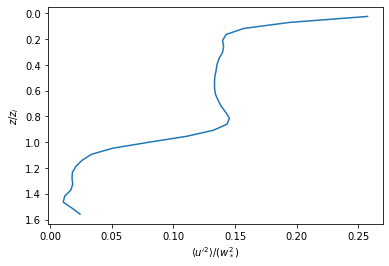

In [126]:
u_p2_NR = (ds_avg.u_p2/w_st_NR**2).rename({'zC':r'$z/z_i$'}).sel(time=slice('2.5 day','3.5 day')).mean('time')
u_p2_NR[r'$z/z_i$'] = -u_p2_NR[r'$z/z_i$']/zi_NR
u_p2_NR = u_p2_NR.rename(r'$\langle u^{\prime 2} \rangle / (w_*^2)$')
u_p2_NR.plot(y=r'$z/z_i$', yincrease=False)

In [136]:
w_p2_FR = (ds_avg.w_p2/w_st_FR**2).rename({'zF':r'$z/z_i$'}).sel(time=slice('2.5 day','3.5 day')).mean('time')
w_p2_FR[r'$z/z_i$'] = -w_p2_FR[r'$z/z_i$']/zi_FR
w_p2_FR = w_p2_FR.rename(r'$\langle w^{\prime 2} \rangle / (w_*^2)$')

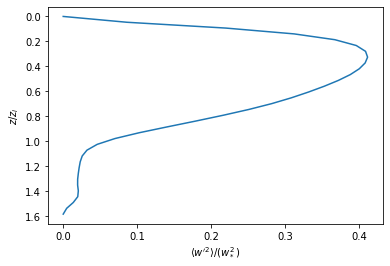

In [127]:
w_p2_NR = (ds_avg.w_p2/w_st_NR**2).rename({'zF':r'$z/z_i$'}).sel(time=slice('2.5 day','3.5 day')).mean('time')
w_p2_NR[r'$z/z_i$'] = -w_p2_NR[r'$z/z_i$']/zi_NR
w_p2_NR = w_p2_NR.rename(r'$\langle w^{\prime 2} \rangle / (w_*^2)$')
w_p2_NR.plot(y=r'$z/z_i$', yincrease=False)

In [144]:
T_p2_FR = (ds_avg.T_p2/T_st_FR**2).rename({'zC':r'$z/z_i$'}).sel(time=slice('2.5 day','3.5 day')).mean('time')
T_p2_FR[r'$z/z_i$'] = -T_p2_FR[r'$z/z_i$']/zi_FR
T_p2_FR = T_p2_FR.rename(r'$\langle T^{\prime 2} \rangle / (T_*^2)$')

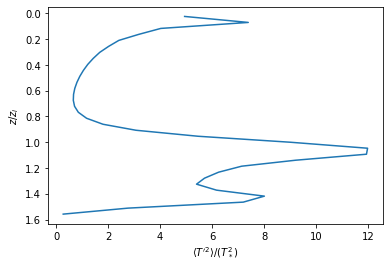

In [128]:
T_p2_NR = (ds_avg.T_p2/T_st_NR**2).rename({'zC':r'$z/z_i$'}).sel(time=slice('2.5 day','3.5 day')).mean('time')
T_p2_NR[r'$z/z_i$'] = -T_p2_NR[r'$z/z_i$']/zi_NR
T_p2_NR = T_p2_NR.rename(r'$\langle T^{\prime 2} \rangle / (T_*^2)$')
T_p2_NR.plot(y=r'$z/z_i$', yincrease=False)

In [145]:
wt_p_FR = (ds_avg.wT_p/(w_st_FR*T_st_FR)).rename({'zF':r'$z/z_i$'}).sel(time=slice('2.5 day','3.5 day')).mean('time')
wt_p_FR[r'$z/z_i$'] = -wt_p_FR[r'$z/z_i$']/zi_FR
wt_p_FR = wt_p_FR.rename(r'$\langle w^{\prime} \Theta^{\prime} \rangle / (w_* T_*)$')

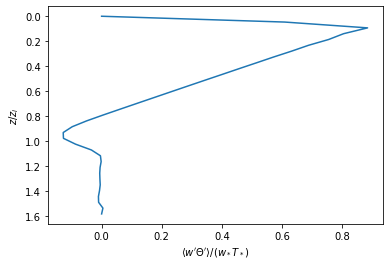

In [130]:
wt_p_NR = (ds_avg.wT_p/(w_st_NR*T_st_NR)).rename({'zF':r'$z/z_i$'}).sel(time=slice('2.5 day','3.5 day')).mean('time')
wt_p_NR[r'$z/z_i$'] = -wt_p_NR[r'$z/z_i$']/zi_NR
wt_p_NR = wt_p_NR.rename(r'$\langle w^{\prime} \Theta^{\prime} \rangle / (w_* T_*)$')
wt_p_NR.plot(y=r'$z/z_i$', yincrease=False)

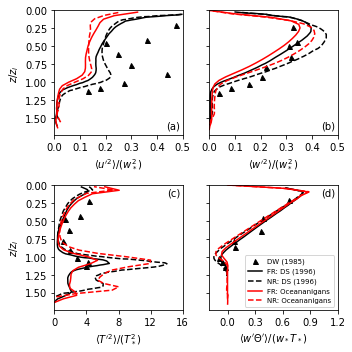

In [150]:
fig, ax = plt.subplots(2,2, sharey=True, figsize=(5,5))

ax[0,0].plot(DW85_a['X'], DW85_a['Y'], ls='', marker='^', markersize=5, c='k')
ax[0,1].plot(DW85_b['X'], DW85_b['Y'], ls='', marker='^', markersize=5, c='k')
ax[1,0].plot(DW85_c['X'], DW85_c['Y'], ls='', marker='^', markersize=5, c='k')
ax[1,1].plot(DW85_d['X'], DW85_d['Y'], ls='', marker='^', markersize=5, c='k', label='DW (1985)')

ax[0,0].plot(V_FR_a['X'], V_FR_a['Y'], c='k')
ax[0,1].plot(V_FR_b['X'], V_FR_b['Y'], c='k')
ax[1,0].plot(V_FR_c['X'], V_FR_c['Y'], c='k')
ax[1,1].plot(V_FR_d['X'], V_FR_d['Y'], c='k', label='FR: DS (1996)')

ax[0,0].plot(V_NR_a['X'], V_NR_a['Y'], ls='--', c='k')
ax[0,1].plot(V_NR_b['X'], V_NR_b['Y'], ls='--', c='k')
ax[1,0].plot(V_NR_c['X'], V_NR_c['Y'], ls='--', c='k')
ax[1,1].plot(V_NR_d['X'], V_NR_d['Y'], ls='--', c='k', label='NR: DS (1996)')


u_p2_FR.plot(y=r'$z/z_i$', yincrease=False, ax=ax[0,0], c='r')
w_p2_FR.plot(y=r'$z/z_i$', yincrease=False, ax=ax[0,1], c='r')
T_p2_FR.plot(y=r'$z/z_i$', yincrease=False, ax=ax[1,0], c='r')
wt_p_FR.plot(y=r'$z/z_i$', yincrease=False, ax=ax[1,1], c='r', label='FR: Oceananigans')

u_p2_NR.plot(y=r'$z/z_i$', yincrease=False, ax=ax[0,0], ls='--', c='r')
w_p2_NR.plot(y=r'$z/z_i$', yincrease=False, ax=ax[0,1], ls='--', c='r')
T_p2_NR.plot(y=r'$z/z_i$', yincrease=False, ax=ax[1,0], ls='--', c='r')
wt_p_NR.plot(y=r'$z/z_i$', yincrease=False, ax=ax[1,1], ls='--', c='r', label='NR: Oceananigans')


ax[0,0].set(title='', xlim=(0,0.5), ylim=(None,0), yticks=[1.5,1.25,1,0.75,0.5,0.25,0], xticks=[0,.1,.2,.3,.4,.5])
ax[0,1].set(title='', xlim=(0,0.5), xticks=[0,.1,.2,.3,.4,.5], ylabel='')
ax[1,0].set(title='', xlim=(0,16), xticks=[0,4,8,12,16])
ax[1,1].set(title='', xlim=(-0.2,1.2), xticks=[0,.3,.6,.9,1.2], ylabel='')

ax[0,0].text(0.435, 1.65, '(a)')
ax[0,1].text(0.435, 1.65, '(b)')
ax[1,0].text(14.0, 0.15, '(c)')
ax[1,1].text(1.02, 0.15, '(d)')

ax[1,1].legend(loc=4, prop={'size': 7})

plt.tight_layout()
plt.savefig('/data/gpfs/projects/punim1661/DS96_varification/results_compare.png', bbox_inches='tight', edgecolor='w', facecolor='w', dpi=300)

In [25]:
import pandas as pd

In [61]:
DW85_a = pd.read_csv('/data/gpfs/projects/punim1661/DS96_varification/DS96_results/DW85_a.csv')
DW85_b = pd.read_csv('/data/gpfs/projects/punim1661/DS96_varification/DS96_results/DW85_b.csv')
DW85_c = pd.read_csv('/data/gpfs/projects/punim1661/DS96_varification/DS96_results/DW85_c.csv')
DW85_d = pd.read_csv('/data/gpfs/projects/punim1661/DS96_varification/DS96_results/DW85_d.csv')

In [62]:
V_FR_a = pd.read_csv('/data/gpfs/projects/punim1661/DS96_varification/DS96_results/V-FR_a.csv')
V_FR_b = pd.read_csv('/data/gpfs/projects/punim1661/DS96_varification/DS96_results/V-FR_b.csv')
V_FR_c = pd.read_csv('/data/gpfs/projects/punim1661/DS96_varification/DS96_results/V-FR_c.csv')
V_FR_d = pd.read_csv('/data/gpfs/projects/punim1661/DS96_varification/DS96_results/V-FR_d.csv')

In [63]:
V_NR_a = pd.read_csv('/data/gpfs/projects/punim1661/DS96_varification/DS96_results/V-NR_a.csv')
V_NR_b = pd.read_csv('/data/gpfs/projects/punim1661/DS96_varification/DS96_results/V-NR_b.csv')
V_NR_c = pd.read_csv('/data/gpfs/projects/punim1661/DS96_varification/DS96_results/V-NR_c.csv')
V_NR_d = pd.read_csv('/data/gpfs/projects/punim1661/DS96_varification/DS96_results/V-NR_d.csv')

In [64]:
DW85_b['X'] = DW85_b['X'] - 0.6
V_FR_b['X'] = V_FR_b['X'] - 0.6
V_NR_b['X'] = V_NR_b['X'] - 0.6

(0.0, 0.5)

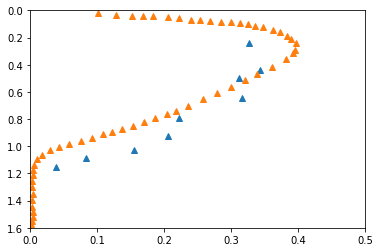

In [66]:
plt.plot(DW85_b['X'], DW85_b['Y'], ls='', marker='^')
plt.plot(V_FR_b['X'], V_FR_b['Y'], ls='', marker='^')
plt.ylim(1.6,0)
plt.xlim(0,0.5)